### クラスタリングとは
クラスタリングとは、与えられたデータから、何かしらの基準を基に、データをグループ分けするタスク  
**教師なし学習**の典型的なタスクとして取り上げられる  
  
例えば、正解ラベルを用意せずに、イヌとネコの対象の画像を投げれば、あとは勝手にイヌとネコの違いを識別し分類してくれる  
ただ、分類が出来るというだけで、それが正しいのか確かめるには結局、正解ラベルや人力を必要とする

### k-means
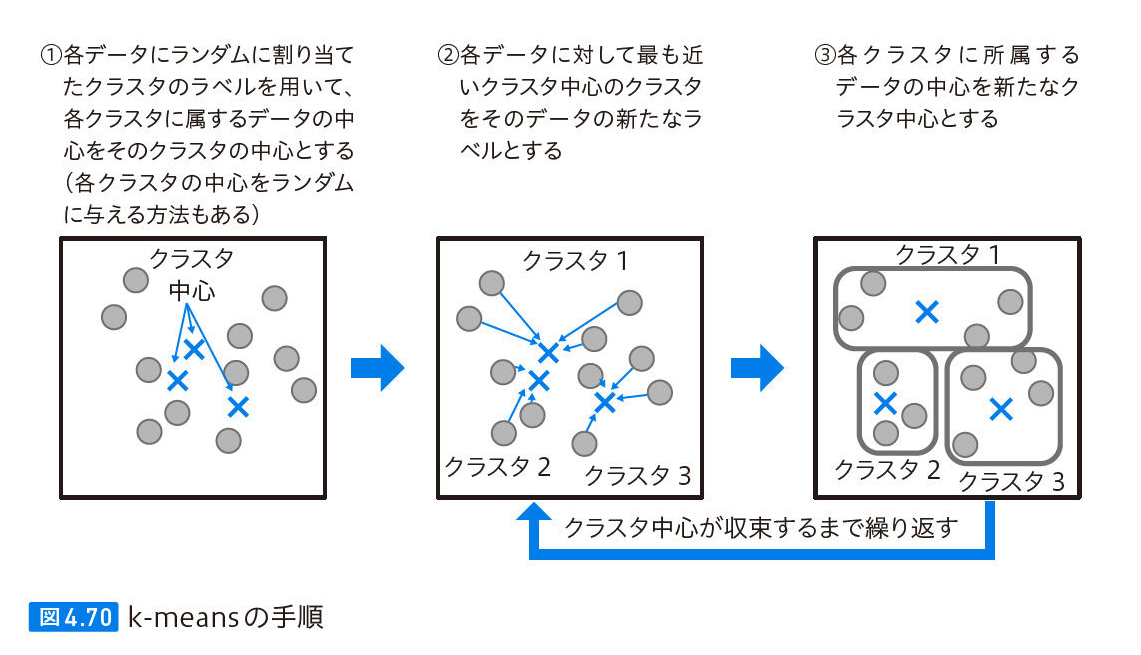  
  
k-meansはk個のクラスタに分類するように行うタスク  
  
1. まず適当にクラスタ中心をk個配布する  
2. 各データがそれぞれ最も近いクラスタ中心を、自分のクラスとして扱う  
3. k個のクラスタに一応分類出来たら、各クラスの中心を次のクラスタ中心とする  
4. 2~3を変更が無くなるまで繰り返す

Irisを使って分かりやすく2分類を行う

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data

# 頭100個のデータ(データ構造上これで2種類のirisになる)と、特徴量を二つ(2次元プロットにするため)
train_data = data[:100,[0,2]]
train_data[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [8]:
label = iris.target[:100]
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

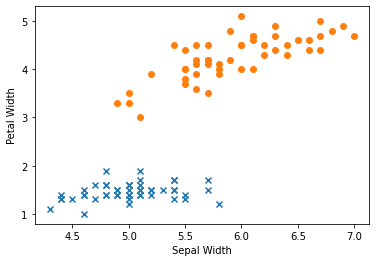

In [9]:
import matplotlib.pyplot as pyplot

canvas,sub_plots = pyplot.subplots()

# 分かりやすさのためにクラスで見た目を変える
sub_plots.scatter(train_data[label==0,0],train_data[label==0,1],marker="x")
sub_plots.scatter(train_data[label==1,0],train_data[label==1,1],marker="o")

sub_plots.set_xlabel("Sepal Width")
sub_plots.set_ylabel("Petal Width")
pyplot.show()

これはクラス分類が出来そうな気がする  
ここで、あえて3クラス分類を試みる  

In [10]:
from sklearn.cluster import KMeans

# クラスタ数3、初期クラスタ中心ランダム、k-means実行回数10回
k_means = KMeans(n_clusters=3,init="random",n_init=10)

predict = k_means.fit_predict(train_data)

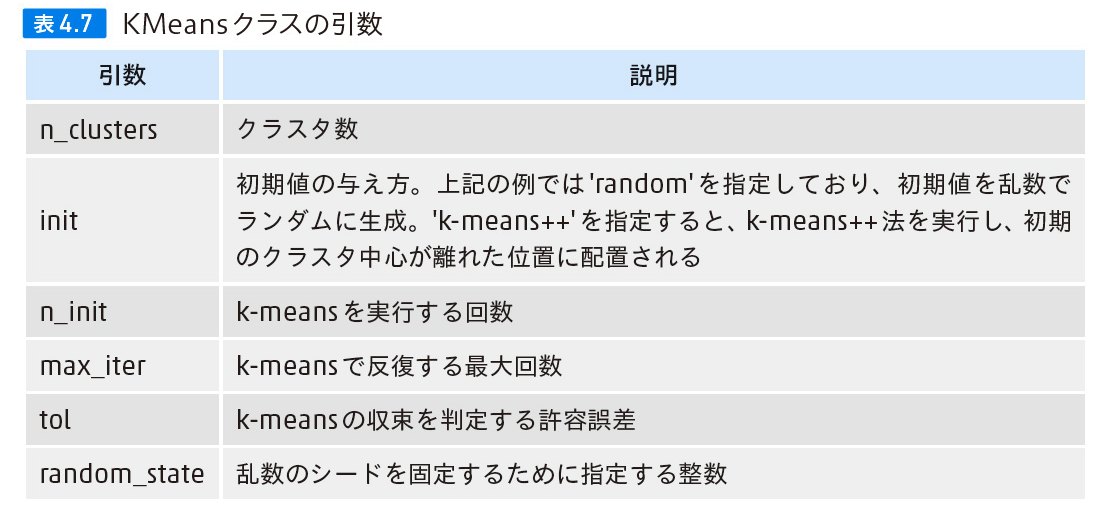

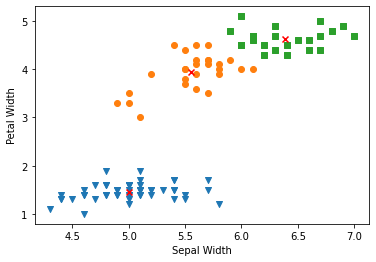

In [13]:
import numpy
canvas,sub_plots = pyplot.subplots()

# 各クラスタ
sub_plots.scatter(train_data[predict==0,0],train_data[predict==0,1],marker="v")
sub_plots.scatter(train_data[predict==1,0],train_data[predict==1,1],marker="o")
sub_plots.scatter(train_data[predict==2,0],train_data[predict==2,1],marker="s")

# 各クラスタ中心
sub_plots.scatter(numpy.mean(train_data[predict==0,0]),numpy.mean(train_data[predict==0,1]),marker="x",color="red")
sub_plots.scatter(numpy.mean(train_data[predict==1,0]),numpy.mean(train_data[predict==1,1]),marker="x",color="red")
sub_plots.scatter(numpy.mean(train_data[predict==2,0]),numpy.mean(train_data[predict==2,1]),marker="x",color="red")

sub_plots.set_xlabel("Sepal Width")
sub_plots.set_ylabel("Petal Width")
pyplot.show()

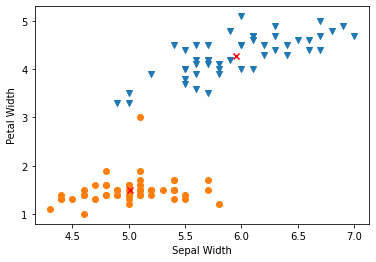

In [14]:
from sklearn.cluster import KMeans

# クラスタ数2、初期クラスタ中心ランダム、k-means実行回数10回
k_means = KMeans(n_clusters=2,init="random",n_init=10)

predict = k_means.fit_predict(train_data)

canvas,sub_plots = pyplot.subplots()

# 各クラスタ
sub_plots.scatter(train_data[predict==0,0],train_data[predict==0,1],marker="v")
sub_plots.scatter(train_data[predict==1,0],train_data[predict==1,1],marker="o")

# 各クラスタ中心
sub_plots.scatter(numpy.mean(train_data[predict==0,0]),numpy.mean(train_data[predict==0,1]),marker="x",color="red")
sub_plots.scatter(numpy.mean(train_data[predict==1,0]),numpy.mean(train_data[predict==1,1]),marker="x",color="red")

sub_plots.set_xlabel("Sepal Width")
sub_plots.set_ylabel("Petal Width")
pyplot.show()

1データ誤りはあるが、大体分類出来ている

### 階層的クラスタリング
階層的クラスタリングは大きく分けて、凝集型、分割型に分類できる  
  
#### 凝集型
小数の似ているデータを集めてクラスタを作る  
小規模クラスタ同士で似たものを集めて、少し大きなクラスタを作る....  
これを繰り返すことで、クラスタリングを行う方法  
  
#### 分割型
まず、大きな一つのクラスタであると仮定して、順次クラスタを分割していく方法  
  
ここでは、凝集型のクラスタリングを行う  
  
凝集型の階層的クラスタリングの基本は、データ間距離をユークリッド距離(直線距離)、クラスタリング方法を最長距離法として行う  
  
※最長距離法 : 2つのクラスタをまとめる際、各クラスタのデータの内最も距離が大きくなる組み合わせで、クラスタ間の距離とする方法

In [16]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")
labels = ac.fit_predict(iris.data)

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

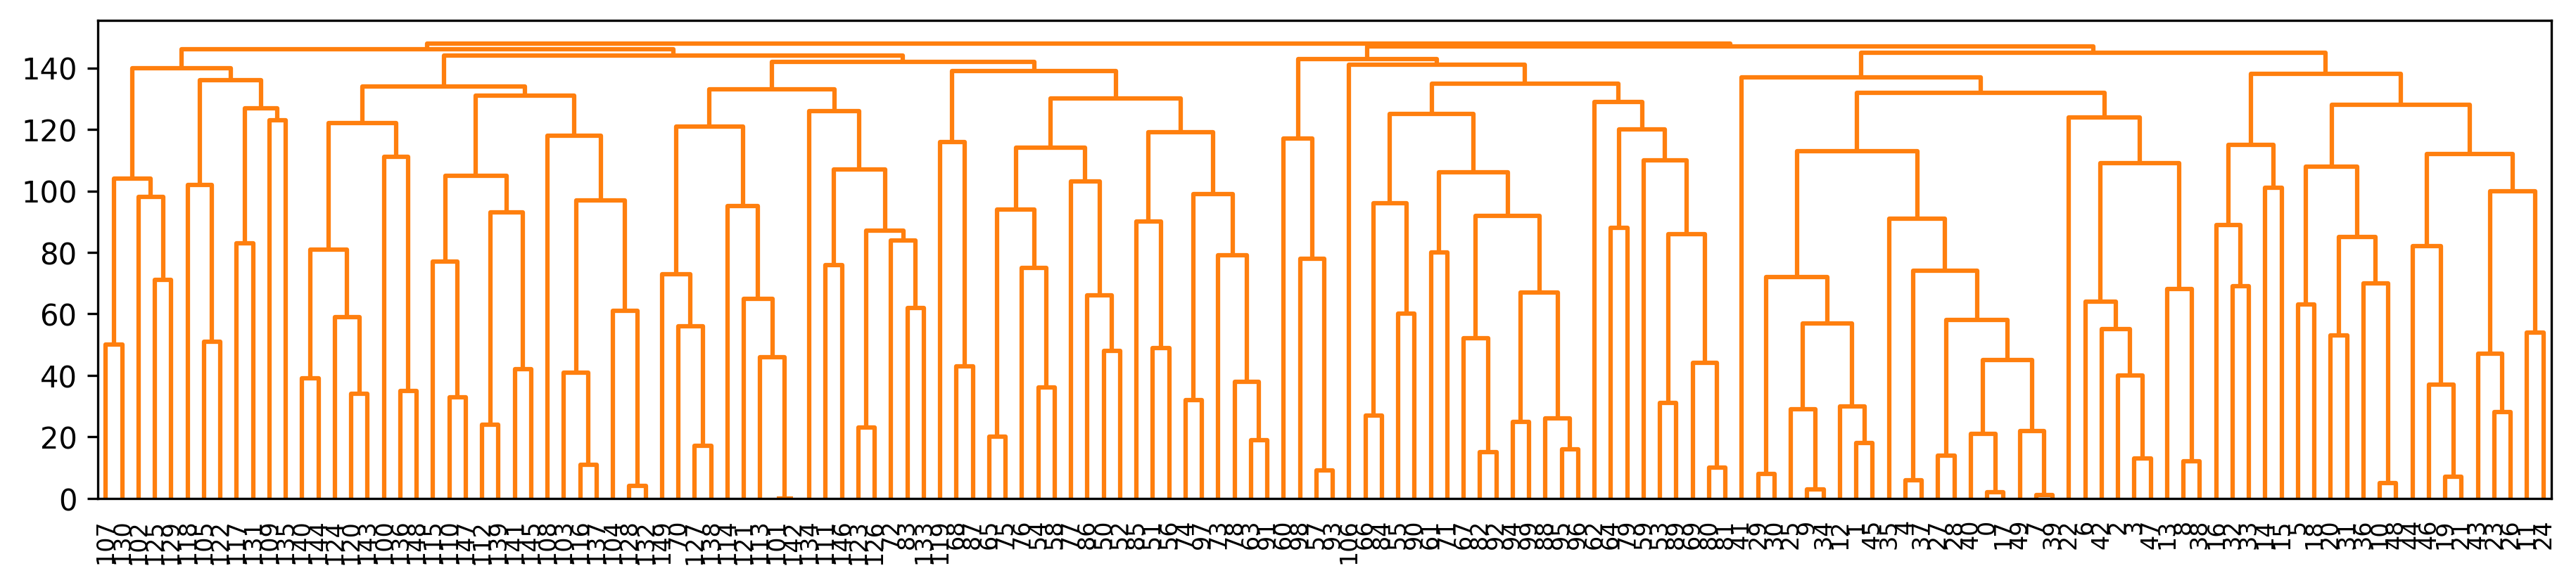

In [21]:
import numpy
from scipy.cluster.hierarchy import dendrogram

children = ac.children_
distance = numpy.arange(children.shape[0])

number_obsevations = numpy.arange(2,children.shape[0]+2)

linkage_matrix = numpy.hstack((children,distance[:,numpy.newaxis],number_obsevations[:,numpy.newaxis])).astype(float)

canvas,sub_plots = pyplot.subplots(figsize=(15,3),dpi=300)
dendrogram(linkage_matrix,labels=numpy.arange(150),leaf_font_size=8,color_threshold=numpy.inf)
pyplot.show()

凝集によってクラスタが形成されていく過程を樹形図で可視化した